In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

In [30]:
np.random.seed(42) # Definition des variables 
n = 150
beta1 = 2
beta2_values = np.linspace(0, 0.16, 9)  # Values of beta2 to test
mse_a1 = []
mse_a2 = []
results = []

x = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 1, n)

In [31]:
for beta2 in beta2_values: # Premier essai
    y = beta1 * x + beta2 * x**2 + epsilon
    
    x_reshape = x.reshape(-1, 1)
    
    # Model a1: simple linear regression (y ~ x)
    model_a1 = LinearRegression().fit(x_reshape, y)
    y_pred_a1 = model_a1.predict(x_reshape)
    mse_a1.append(mean_squared_error(y, y_pred_a1))
    coef_a1 = (model_a1.intercept_, model_a1.coef_[0])
    
    # Model a2: quadratic regression (y ~ x + x^2)
    x_quad = np.column_stack((x, x**2))
    model_a2 = LinearRegression().fit(x_quad, y)
    y_pred_a2 = model_a2.predict(x_quad)
    mse_a2.append(mean_squared_error(y, y_pred_a2))
    coef_a2 = (model_a2.intercept_, model_a2.coef_[0], model_a2.coef_[1])

    results.append({
        'beta2': beta2,
        'coef_a1_intercept': coef_a1[0],
        'coef_a1_x': coef_a1[1],
        'mse_a1': mean_squared_error(y, y_pred_a1),
        'coef_a2_intercept': coef_a2[0],
        'coef_a2_x': coef_a2[1],
        'coef_a2_x2': coef_a2[2],
        'mse_a2': mean_squared_error(y, y_pred_a2)
    })

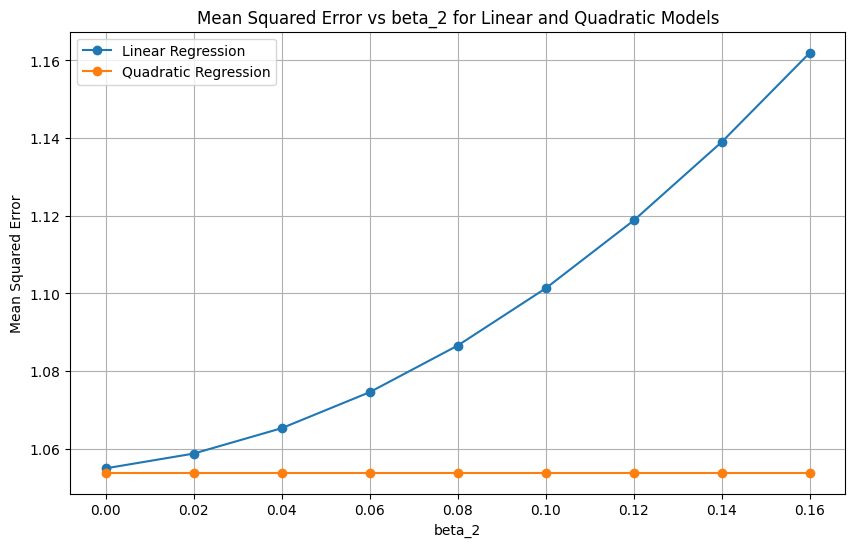

In [32]:

plt.figure(figsize=(10, 6))
plt.plot(beta2_values, mse_a1, label='Linear Regression', marker='o')
plt.plot(beta2_values, mse_a2, label='Quadratic Regression', marker='o')
plt.xlabel(r'beta_2')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs beta_2 for Linear and Quadratic Models')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
df_results = pd.DataFrame(results)
df_results

,beta2,coef_a1_intercept,coef_a1_x,mse_a1,coef_a2_intercept,coef_a2_x,coef_a2_x2,mse_a2
0,0.00,-0.035853,2.034981,1.054958,0.033616,1.947102,0.017792,1.053876
1,0.02,-0.113943,2.133767,1.058761,0.033616,1.947102,0.037792,1.053876
2,0.04,-0.192034,2.232554,1.065299,0.033616,1.947102,0.057792,1.053876
3,0.06,-0.270124,2.331340,1.074574,0.033616,1.947102,0.077792,1.053876
4,0.08,-0.348214,2.430126,1.086585,0.033616,1.947102,0.097792,1.053876
5,0.10,-0.426304,2.528912,1.101333,0.033616,1.947102,0.117792,1.053876
6,0.12,-0.504394,2.627698,1.118816,0.033616,1.947102,0.137792,1.053876
7,0.14,-0.582484,2.726484,1.139036,0.033616,1.947102,0.157792,1.053876
8,0.16,-0.660575,2.825270,1.161992,0.033616,1.947102,0.177792,1.053876


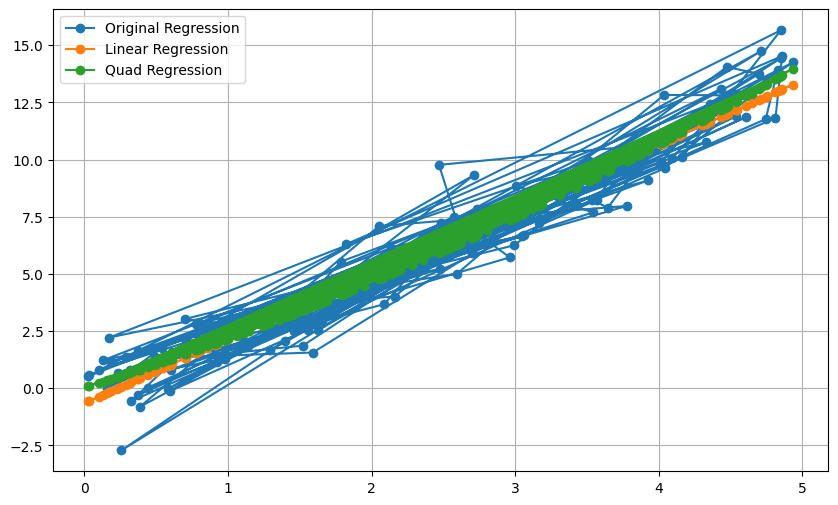

In [23]:

# avec le dernier beta
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Regression', marker='o')
plt.plot(x, y_pred_a1, label='Linear Regression', marker='o')
plt.plot(x, y_pred_a2, label='Quad Regression', marker='o')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
def calcul_t_stat():
        
   empiriques = [] 
   variances = []
   test_statistics = []
   for beta2 in beta2_values:
    
       y = beta1 * x + beta2 * x**2 + epsilon # generation de données

       x_reshape = x.reshape(-1, 1) # fit pour le modèle 

       model_a1 = LinearRegression().fit(x_reshape, y) # modélisation
       y_pred_a1 = model_a1.predict(x_reshape)
       x_quad = np.column_stack((x, x**2))
       model_a2 = LinearRegression().fit(x_quad, y)
       y_pred_a2 = model_a2.predict(x_quad)


       p1 = y - y_pred_a1 # tableau d'erreur de prédiction pour les modèles 1 et 2
       p2 = y - y_pred_a2

       d = p2 - p1
       d_barre = (sum(d))/150 # moyenne des différences


       var = (sum((d-d_barre)**2))/149
       test_stat = (150**0.5)*d_barre/var # Statistique pour l'hypothèse nulle
       
       empiriques.append(d_barre)
       variances.append(var)
       test_statistics.append(test_stat)

   return empiriques, variances, test_statistics

empiriques, variances, test_statistics = calcul_t_stat()


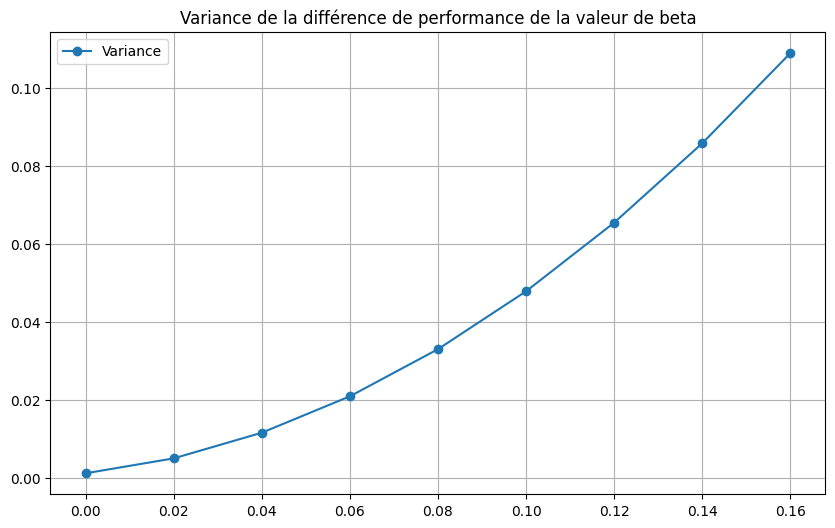

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(beta2_values, variances, label='Variance', marker='o')
plt.title('Variance de la différence de performance de la valeur de beta')
plt.legend()
plt.grid(True)
plt.show()

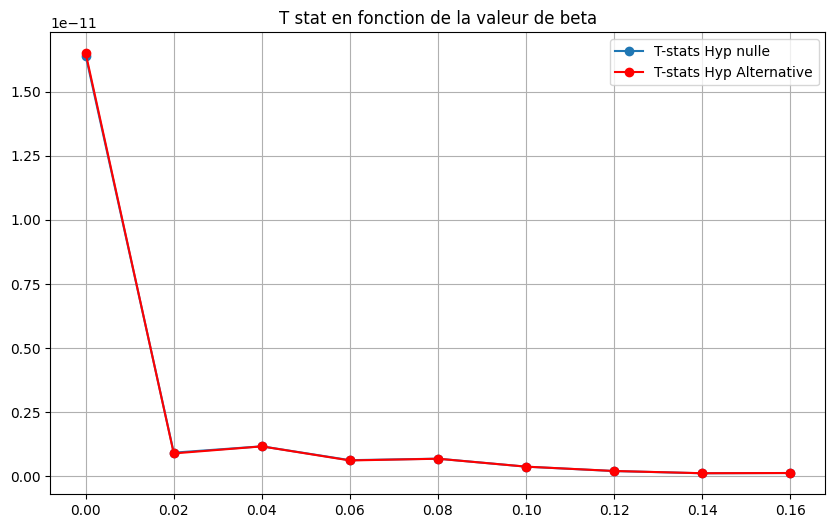

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(beta2_values, test_statistics, label='T-stats Hyp nulle', marker='o')
plt.title('T stat en fonction de la valeur de beta')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
power = 1 - stats.norm.cdf(test_statistics)
power
    

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

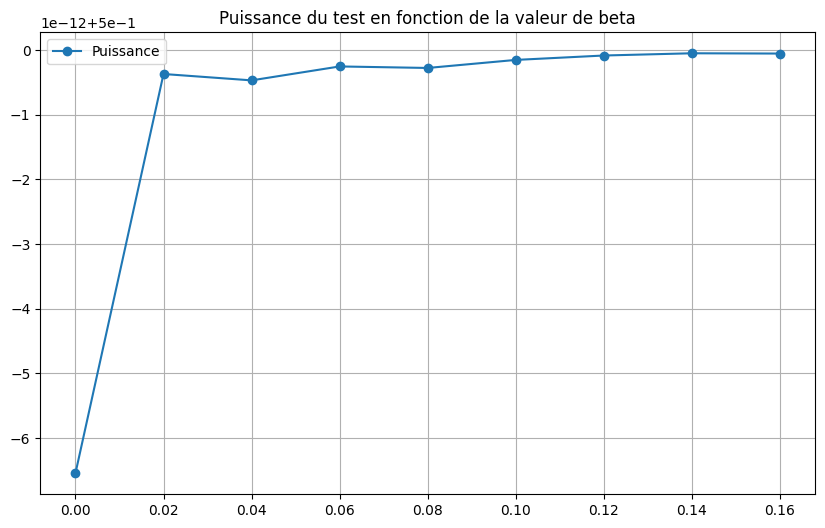

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(beta2_values, power, label='Puissance', marker='o')
plt.title('Puissance du test en fonction de la valeur de beta')
plt.legend()
plt.grid(True)
plt.show()
